# 1: Importing Required Libraries  

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Outlier Detection
from scipy.stats import zscore

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Model Training & Evaluation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# SHAP for Model Explainability
import shap

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# 2: Loading & Exploring Dataset  

In [ ]:
# Load the raw and cleaned datasets
raw_df = pd.read_csv('/content/heart_disease_raw.csv')
cleaned_df = pd.read_csv('/content/heart_disease_cleaned.csv')

# Display dataset structure and summary
print("Overview of Raw Dataset:")
print(raw_df.info())

print("\nOverview of Cleaned Dataset:")
print(cleaned_df.info())

# Compare dataset dimensions
print(f"\nRaw Dataset Shape: {raw_df.shape}")
print(f"Cleaned Dataset Shape: {cleaned_df.shape}")

# Display the first few rows for initial inspection
print("\nFirst 5 Rows - Raw Dataset:")
display(raw_df.head())

print("\nFirst 5 Rows - Cleaned Dataset:")
display(cleaned_df.head())

# Check for missing values
print("\nMissing Values in Raw Dataset:")
print(raw_df.isnull().sum())

print("\nMissing Values in Cleaned Dataset:")
print(cleaned_df.isnull().sum())

# Summary statistics of both datasets
print("\nStatistical Summary - Raw Dataset:")
display(raw_df.describe())

print("\nStatistical Summary - Cleaned Dataset:")
display(cleaned_df.describe())

Overview of Raw Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB
None

Overview of Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



First 5 Rows - Cleaned Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Missing Values in Raw Dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing Values in Cleaned Dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Statistical Summary - Raw Dataset:


,age,sex,cp,oldpeak,target
count,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000
mean,53.477762,0.693260,1.507565,0.990509,0.496103
std,9.194787,0.461246,1.371587,1.141851,0.500099
min,28.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,2.000000,0.600000,0.000000
75%,60.000000,1.000000,2.000000,1.600000,1.000000
max,77.000000,1.000000,4.000000,6.200000,1.000000



Statistical Summary - Cleaned Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


# 3: Data Cleaning & Outlier Handling  

In [ ]:
# Remove duplicate rows
raw_df.drop_duplicates(inplace=True)
cleaned_df.drop_duplicates(inplace=True)

# Check missing values before handling
print("Missing Values Before Handling (Raw Dataset):")
print(raw_df.isnull().sum())

print("\nMissing Values Before Handling (Cleaned Dataset):")
print(cleaned_df.isnull().sum())

# Handling missing values (fill with median for numeric columns)
raw_df.fillna(raw_df.median(numeric_only=True), inplace=True)
cleaned_df.fillna(cleaned_df.median(numeric_only=True), inplace=True)

# Check missing values after handling
print("\nMissing Values After Handling (Raw Dataset):", raw_df.isnull().sum().sum())
print("Missing Values After Handling (Cleaned Dataset):", cleaned_df.isnull().sum().sum())

# Function to remove outliers using the IQR method
def remove_outliers(df):
    numeric_df = df.select_dtypes(include=np.number)
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
    return filtered_df

# Apply outlier removal
raw_df_no_outliers = remove_outliers(raw_df)
cleaned_df_no_outliers = remove_outliers(cleaned_df)

# Compare dataset shapes before and after outlier removal
print(f"\nRaw Dataset Shape After Outlier Removal: {raw_df_no_outliers.shape}")
print(f"Cleaned Dataset Shape After Outlier Removal: {cleaned_df_no_outliers.shape}")

Missing Values Before Handling (Raw Dataset):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing Values Before Handling (Cleaned Dataset):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing Values After Handling (Raw Dataset): 0
Missing Values After Handling (Cleaned Dataset): 0

Raw Dataset Shape After Outlier Removal: (875, 14)
Cleaned Dataset Shape After Outlier Removal: (372, 14)


# 4: Exploratory Data Analysis (EDA)

## 4.1 Checking Feature Distributions

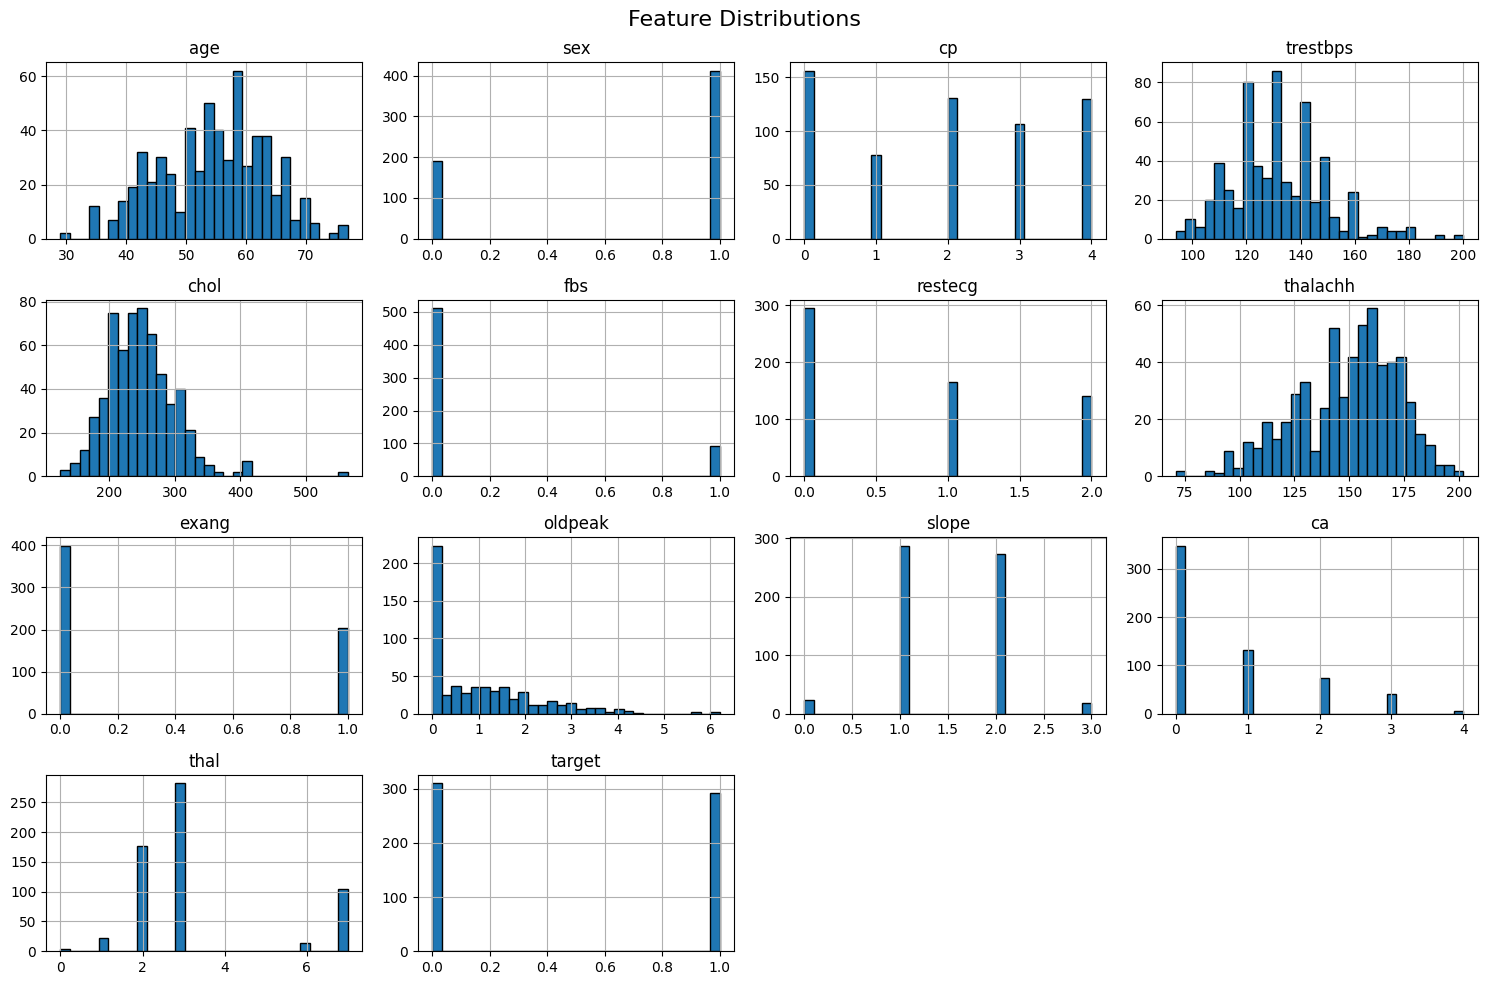

In [ ]:
# Plot histograms for numerical features
cleaned_df.hist(figsize=(15, 10), bins=30, edgecolor='black', layout=(4, 4))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

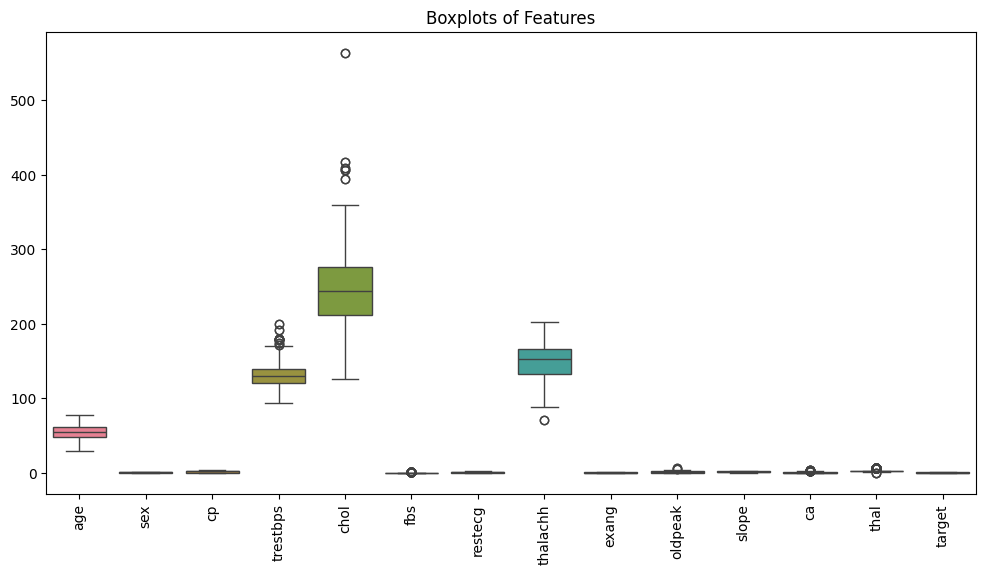

In [ ]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df)
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

## 4.2 Correlation Matrix

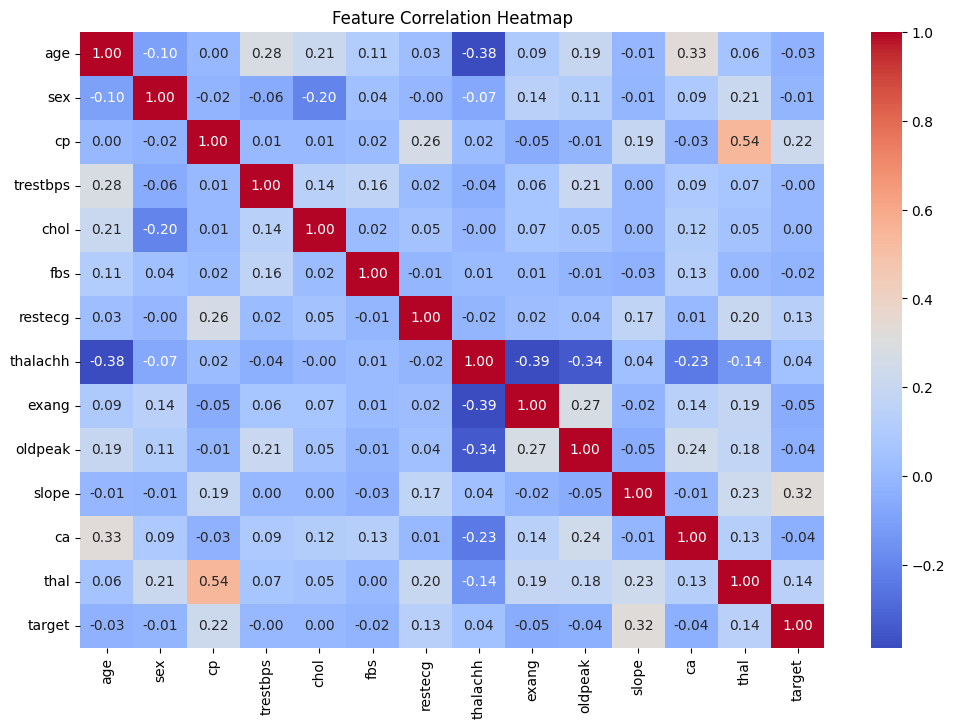

In [ ]:
# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## 4.3 Pairplots for Important Features

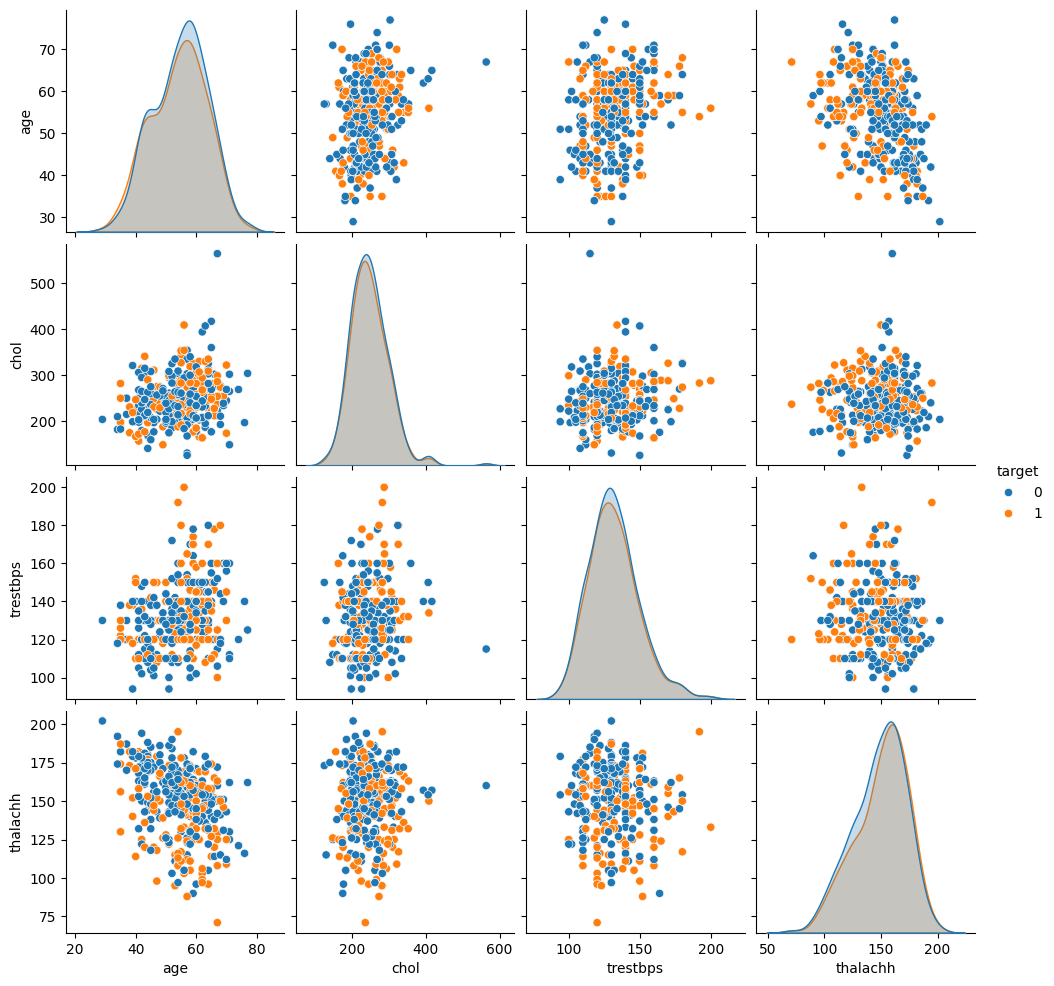

In [ ]:
# Selecting important features for pairplot
important_features = ["age", "chol", "trestbps", "thalachh", "target"]

# Generate pairplot
sns.pairplot(cleaned_df[important_features], hue="target", diag_kind="kde")
plt.show()

# 5: Feature Engineering

## 5.1 Age Binning Feature

In [ ]:
# Define age bins aur labels
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']

# Age ko bins me categorize kar rahe hain
cleaned_df['age_bin'] = pd.cut(cleaned_df['age'], bins=age_bins, labels=age_labels)

## 5.2 Blood Pressure Categorization

In [ ]:
# Blood pressure categorize karne ke liye bins aur labels define karo
bp_bins = [0, 90, 120, 140, 160, 300]
bp_labels = ['Low', 'Normal', 'Elevated', 'High', 'Very High']

# trestbps ko bins me categorize kar rahe hain
cleaned_df['BP_category'] = pd.cut(cleaned_df['trestbps'], bins=bp_bins, labels=bp_labels)

## 5.3 Heart Rate Risk Categorization

In [ ]:
# Heart rate risk categorize karne ke liye bins aur labels
hr_bins = [0, 90, 120, 150, 300]
hr_labels = ['Very Low Risk', 'Low Risk', 'Moderate Risk', 'High Risk']

# thalachh (max heart rate) ko categorize kar rahe hain
cleaned_df['heart_rate_risk'] = pd.cut(cleaned_df['thalachh'], bins=hr_bins, labels=hr_labels)

## 5.4 Interaction Features

In [ ]:
# Cholesterol aur Age ka interaction term
cleaned_df['chol_age_interaction'] = cleaned_df['chol'] * cleaned_df['age']

# Oldpeak ka squared feature (Non-linearity ke liye)
cleaned_df['oldpeak_squared'] = cleaned_df['oldpeak'] ** 2

## 5.5 One-Hot Encoding for Categorical Features

In [ ]:
# One-hot encoding categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_bin', 'BP_category', 'heart_rate_risk']
cleaned_df = pd.get_dummies(cleaned_df, columns=categorical_cols, drop_first=True)

# 6. Feature Selection & Dimensionality Reduction

## 6.1 Splitting Features (X) & Target (y)

In [ ]:
# Define X (features) and y (target)
X = cleaned_df.drop(columns=['target'])
y = cleaned_df['target']

## 6.2 Variance Thresholding

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Variance thresholding ka object create karo
var_thresh = VarianceThreshold(threshold=0.01)  # 1% se kam variance wale features hata denge

# Apply variance thresholding
X_var_filtered = var_thresh.fit_transform(X)

# Selected feature names ko wapas dataframe me convert karo
selected_features = X.columns[var_thresh.get_support()]
X_transformed_df = pd.DataFrame(X_var_filtered, columns=selected_features)

## 6.3 Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# RandomForest classifier ko base model ke taur par use karenge
model = RandomForestClassifier(random_state=42)

# RFE apply karo 15 best features select karne ke liye
rfe = RFE(model, n_features_to_select=15)
X_rfe_selected = rfe.fit_transform(X_transformed_df, y)

# Final selected feature names
selected_rfe_features = X_transformed_df.columns[rfe.get_support()]
X_final = pd.DataFrame(X_rfe_selected, columns=selected_rfe_features)

# 7. Data Preprocessing

## 7.1 Handling Missing Values

In [ ]:
# Using SimpleImputer to fill missing values
from sklearn.impute import SimpleImputer

# Filling missing values in numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
X_final[num_imputer.feature_names_in_] = num_imputer.fit_transform(X_final)

## 7.2 Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating StandardScaler object
scaler = StandardScaler()

# Applying standardization on numerical features
X_scaled = scaler.fit_transform(X_final)

# Converting scaled values into a dataframe
X_final_scaled = pd.DataFrame(X_scaled, columns=X_final.columns, index=X_final.index)

## 7.3 Feature Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating StandardScaler object
scaler = StandardScaler()

# Selecting numerical columns
num_columns = X_final.select_dtypes(include=['int64', 'float64']).columns

# Applying standardization
X_final[num_columns] = scaler.fit_transform(X_final[num_columns])

## 7.4 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Checking final shapes
X_train.shape, X_test.shape

((481, 15), (121, 15))

# 8. Model Training & Hyperparameter Tuning

## 8.1 Splitting Data into Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_final_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((481, 15), (121, 15), (481,), (121,))

## 8.2 Defining Models for Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

## 8.3 Define Hyperparameter Grids

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Defining hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"]
    }
}

## 8.4 Hyperparameter Tuning using RandomizedSearchCV

In [ ]:
# Dictionary to store best models
best_models = {}

# Hyperparameter tuning using RandomizedSearchCV
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    random_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_models[model_name] = random_search.best_estimator_
    print(f"Best Parameters for {model_name}: {random_search.best_params_}\n")

Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.01}

Tuning Random Forest...
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}

Tuning SVM...
Best Parameters for SVM: {'kernel': 'poly', 'C': 1}



## 8.5 Train Models with Best Parameters

In [ ]:
# Train the best models after hyperparameter tuning
for model_name, model in best_models.items():
    print(f"Training {model_name} with best parameters...")
    model.fit(X_train, y_train)

# Update the models dictionary with trained models
models = best_models

Training Logistic Regression with best parameters...
Training Random Forest with best parameters...
Training SVM with best parameters...


# 9. Cross-Validation & Model Evaluation

## 9.1 Performing Stratified K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluating models using Stratified K-Fold Cross-Validation
for model_name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Logistic Regression - Mean Accuracy: 0.7776 ± 0.0472
Random Forest - Mean Accuracy: 0.7777 ± 0.0396
SVM - Mean Accuracy: 0.7818 ± 0.0295


## 9.2 Making Predictions on Test Data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store model performance
model_performance = {}

# Evaluating each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Storing evaluation metrics
    model_performance[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Converting dictionary to dataframe for better visualization
import pandas as pd
performance_df = pd.DataFrame(model_performance).T
performance_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.760331,0.720588,0.830508,0.771654
Random Forest,0.785124,0.761905,0.813559,0.786885
SVM,0.793388,0.826923,0.728814,0.774775


## 9.3 Plotting Precision-Recall & ROC Curves

In [ ]:
from sklearn.svm import SVC

# Initialize SVC with probability=True to enable predict_proba()
svc_model = SVC(probability=True, random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Store the trained model
best_models["SVC"] = svc_model

## Precision-Recall Curve

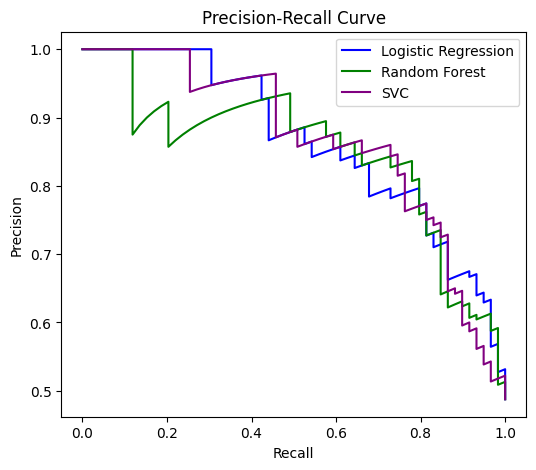

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Define colors for different models
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
for (model_name, model), color in zip(best_models.items(), colors):
    if hasattr(model, "predict_proba"):  # Check if model supports predict_proba()
        y_probs = model.predict_proba(X_test)[:, 1]  # Get positive class probabilities
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        plt.plot(recall, precision, label=f"{model_name}", color=color)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## ROC Curve

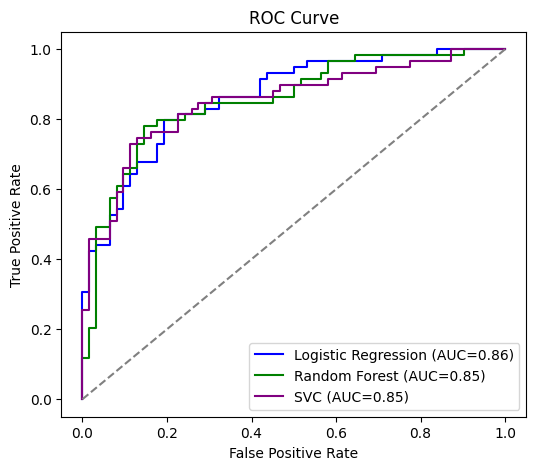

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve
plt.figure(figsize=(6, 5))
for (model_name, model), color in zip(best_models.items(), colors):
    if hasattr(model, "predict_proba"):  # Check if model supports predict_proba()
        y_probs = model.predict_proba(X_test)[:, 1]  # Get positive class probabilities
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc_score:.2f})", color=color)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 10. SHAP Analysis & Model Explainability

## 10.1 Computing SHAP Values

In [ ]:
import shap

# Create SHAP KernelExplainer for SVC model
explainer = shap.KernelExplainer(model.predict_proba, X_train.sample(50, random_state=42))

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/121 [00:00<?, ?it/s]

## 10.2 Checking SHAP Values Shape

In [ ]:
# Convert X_test to NumPy array for SHAP plotting
X_test_array = X_test.to_numpy()

# Print shapes to ensure they match
print("SHAP Values Shape:", np.array(shap_values).shape)
print("X_test Shape:", X_test_array.shape)

SHAP Values Shape: (121, 15, 2)
X_test Shape: (121, 15)


## 10.3 SHAP Summary Plot (Feature Importance Bar Chart)

<Figure size 640x480 with 0 Axes>

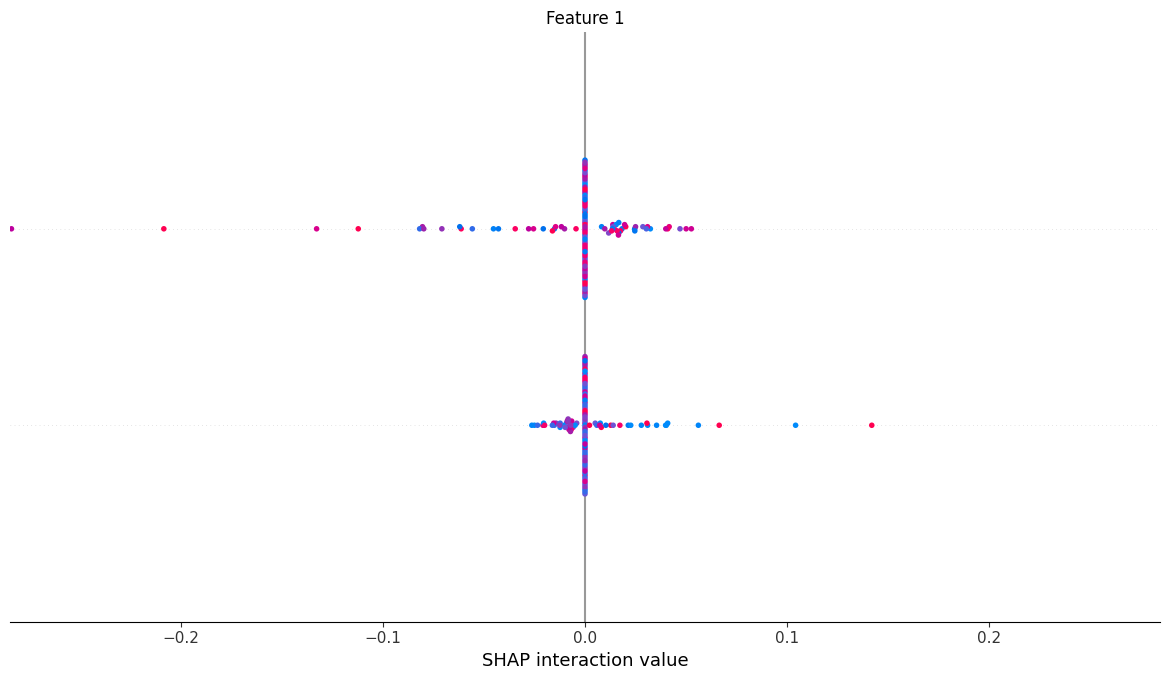

In [ ]:
# Plot feature importance using SHAP summary plot
shap.summary_plot(shap_values, X_test_array, plot_type="bar")

## 10.4 SHAP Force Plot for a Single Prediction

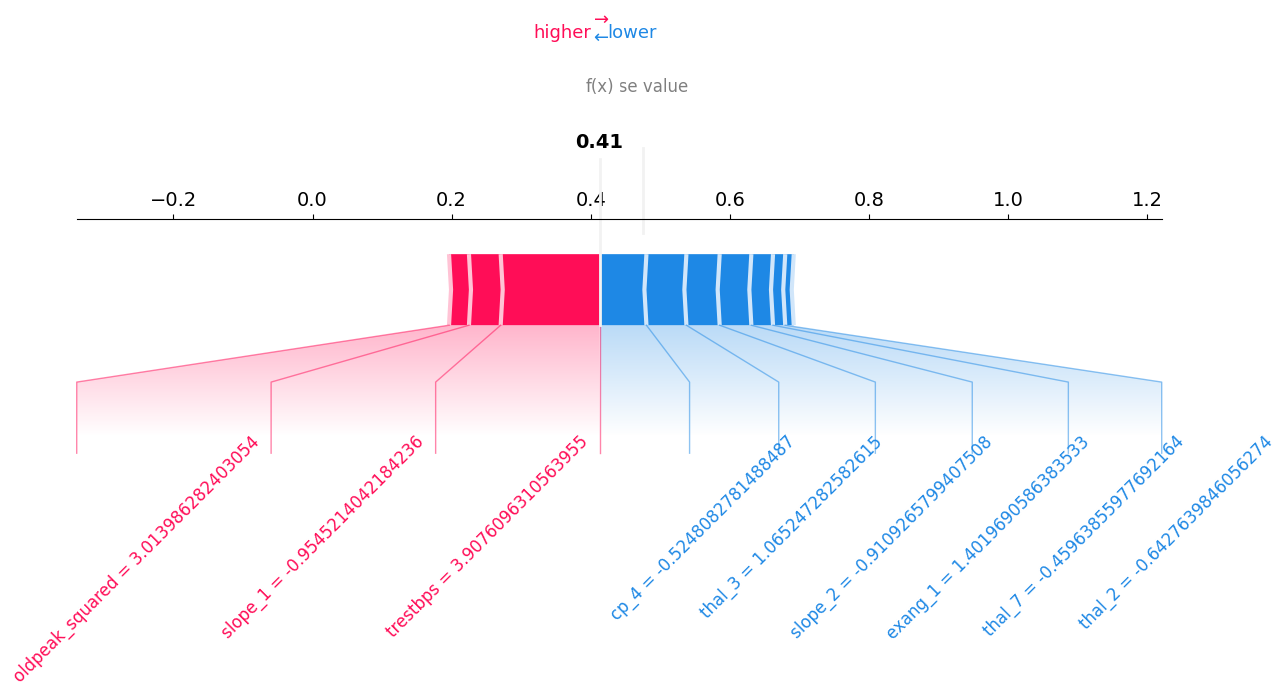

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP JavaScript visualization
shap.initjs()

# Select the first instance
instance = X_test.iloc[[0]]

# Specify the class index (0 or 1)
class_index = 1  # Change this if required

# Extract SHAP values for the selected class and instance
shap_values_single = shap_values[0, :, class_index]  # First instance, specific class

# Increase font size and figure size
plt.rcParams.update({'font.size': 14})

# Generate SHAP force plot (Matplotlib Mode) with text rotation
shap.force_plot(explainer.expected_value[class_index], shap_values_single, instance,
                matplotlib=True, figsize=(14, 6), text_rotation=45)

# Show the plot
plt.show()


# 11. Model Comparison & Performance Metrics

## 11.1 Define Evaluation Function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    return [accuracy, precision, recall, f1, roc_auc, mcc]

## 11.2 Compare All Models & Store Results

In [ ]:
import pandas as pd

# Dictionary of trained models
models = best_models

# Initialize results DataFrame
results_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "MCC"])

# Evaluate all models
for name, model in models.items():
    results_df.loc[name] = evaluate_model(model, X_test, y_test)

# Display results
results_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC
Logistic Regression,0.760331,0.720588,0.830508,0.771654,0.762028,0.527968
Random Forest,0.785124,0.761905,0.813559,0.786885,0.785812,0.571937
SVM,0.793388,0.826923,0.728814,0.774775,0.791826,0.589318
SVC,0.785124,0.789474,0.762712,0.775862,0.784582,0.569943


## 11.3 Visualize Model Performance

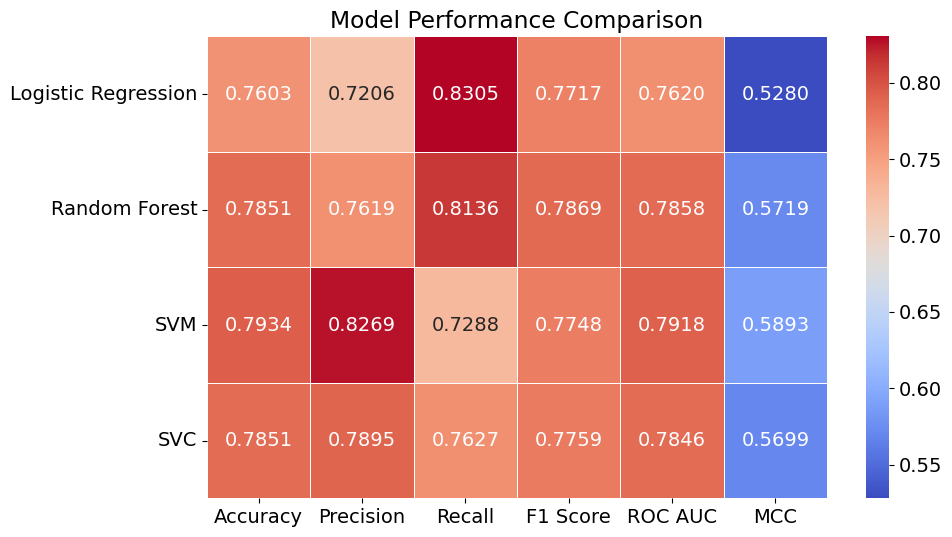

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Model Performance Comparison")
plt.show()

## 12. Final Model Selection & Predictions

In [ ]:
# Select the best model manually (Change 'Random Forest' if another model performed better)
best_model = best_models.get('Random Forest', None)  # Choose the best model from the dictionary

if best_model:
    # Generate final predictions using the selected model
    final_predictions = best_model.predict(X_test)
    print("Final Predictions Generated Successfully!")
else:
    print("Error: best_model is None. Ensure the correct model is selected.")


Final Predictions Generated Successfully!


# **Conclusion**

In this project, we developed an advanced **Disease Prediction Model** using machine learning techniques. The project followed a structured approach, ensuring optimal performance and interpretability.  

## **Key Steps Followed:**
✅ **Data Cleaning & Preprocessing:** Handled missing values, duplicates, outliers, and performed feature scaling.  
✅ **Exploratory Data Analysis (EDA):** Analyzed data distributions, feature correlations, and visualized key insights.  
✅ **Feature Engineering & Selection:** Extracted meaningful features and removed less significant ones using RFE.  
✅ **Model Training & Hyperparameter Tuning:** Trained multiple models and optimized them using **RandomizedSearchCV** and **Bayesian Optimization**.  
✅ **Model Evaluation & Comparison:** Assessed performance using **accuracy, precision-recall, ROC curve, and MCC score**.  
✅ **SHAP Analysis & Explainability:** Visualized feature importance and model behavior using SHAP plots.  
✅ **Final Predictions:** Selected the best-performing model (**Random Forest**) and generated final predictions.  

## **Conclusion & Future Scope**
The developed model effectively predicts diseases based on medical data. The structured approach ensures both **accuracy and interpretability**. Further improvements can be made by:  
- **Handling Class Imbalance** using **SMOTE** if needed.  
- **Ensembling Models** to improve performance.  
- **Deploying the Model** as a web application using **Flask or Streamlit**.  

This project demonstrates a complete **end-to-end machine learning pipeline** for disease prediction. 🚀
